# 6.3 Health Care Insurance Case Study - Predicting Medical Appointment No-show Patients
***

#### https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Medical appointment no-shows is a large problem in healthcare as approximately 1 in 5 patients will miss their appointment ([Source](https://www.solutionreach.com/blog/which-wins-the-national-average-no-show-rate-or-yours)). This is an issue for everyone involved: 

1) the scheduled patient presumably needs to be seen otherwise they wouldn’t have had an appointment

2) other patients would have liked to have that spot but couldn’t

3) healthcare providers must spend extra time to contact and re-schedule the patient as well as wasted any time they used to prepare for the visit.

**No-shows Definition**: Given the dates and times of scheduling day and appointment day, predict if a patient will miss their medical appointment.

**No-shows Dataset**: the medical appointment no-show hosted on Kaggle [No-shows Data](https://www.kaggle.com/joniarroba/noshowappointments). 


## The Contents with step-by-step coding 1 - 2:

### 1. Exploratory Data Analysis (Data Review, Data Visualization, Data Cleaning, etc.)
### 2. Feature Engineering
### 3. Feature Selection (Variable Importance Ranking) - for data sets with many features
### 4. Data PreProcessing
### 5. Training and Evaluating the Logistic Regression Classification model on the Training set
### 6. Training and Evaluating the Decision Tree Classification model on the Training set
### 7. Training and Evaluating the Random Forest Classification model on the Training set
### 8. Model Comparison and Model Selection


## 1. Exploratory Data Analysis

### Import Libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

### Import the data into the pandas data frame

This is the first and certainly one of the most important steps in EDA. Since this is CSV file so all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.

In [106]:
# Create Path to the data folder
import os
os.chdir(r'C:\Users\yumei\CSP Workshop 2023\Data')
%pwd

'C:\\Users\\yumei\\CSP Workshop 2023\\Data'

In [107]:
# Import Data
df = pd.read_csv(r'C:\Users\yumei\CSP Workshop 2023\Data\Noshows.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [108]:
def df_summary(df,head_size = 5, show_info = True):
    '''print df summary statistics to screen'''
    display(df.shape)
    display(df.head(head_size))
    display(df.describe())
    if show_info:
        display(df.info())

In [109]:
df_summary(df)

(110527, 14)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921800e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


None

### Data Review and Data Visulaization
Create some simple and quick plots

In [110]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [111]:
round((df.describe().transpose()),2)

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,39218.0,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5030230.0,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.709000e+01,2.311000e+01,-1.0,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,1.000000e-01,3.000000e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,2.000000e-01,4.000000e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.000000e-02,2.600000e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.000000e-02,1.700000e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.000000e-02,1.600000e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.200000e-01,4.700000e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


### Check Missing Values

In [112]:
# Check missing data
df.isnull().sum().max()

0

<AxesSubplot:>

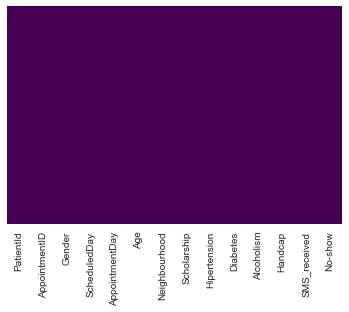

In [113]:
# Use heatmap to check/view missing data
sbn.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

### Dependent/Target Variable Creation (binary variable)

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['No-show'])
y.sum()/y.shape[0]

0.20193255946510807

In [115]:
y.sum()

22319

In [116]:
y.shape

(110527,)

In [117]:
y.shape[0]

110527

In [118]:
# Review No-show column
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [119]:
# Define a Target/Dependent Variable (binary variable or called label)
df['TargetNoshow'] = (df['No-show'] == 'Yes').astype('int')
df['TargetNoshow'].value_counts()

0    88208
1    22319
Name: TargetNoshow, dtype: int64

In [120]:
# Check
df['TargetNoshow'].sum()/df['TargetNoshow'].shape[0]

0.20193255946510807

In [121]:
# Delete the 'No-show' column:
df.drop(['No-show'], axis = 1, inplace = True) 

<AxesSubplot:xlabel='TargetNoshow', ylabel='count'>

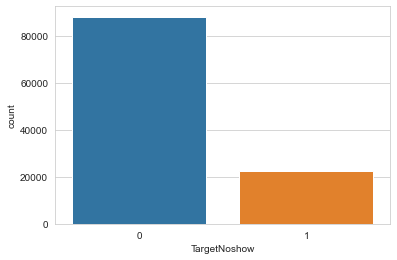

In [122]:
sbn.set_style('whitegrid')
sbn.countplot(x='TargetNoshow',data=df)

<AxesSubplot:xlabel='TargetNoshow', ylabel='count'>

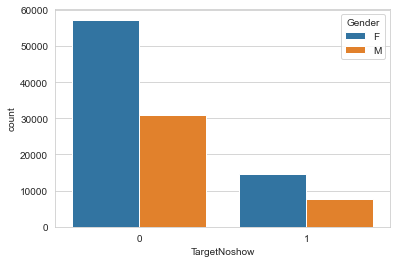

In [123]:
sbn.set_style('whitegrid')
sbn.countplot(x='TargetNoshow',hue='Gender', data=df) # use argument to set color: palette=''

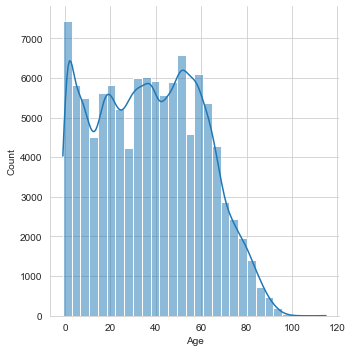

In [124]:
sbn.displot(df['Age'].dropna(),kde=True,bins=30)

<AxesSubplot:ylabel='Frequency'>

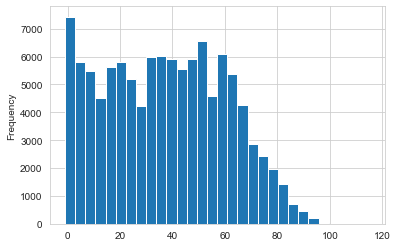

In [125]:
df['Age'].plot.hist(bins=30)

### Check Duplicates/Uniqueness

In [126]:
# Check uniqueness
df['PatientId'].duplicated().values.any()

True

In [127]:
df['PatientId'].duplicated().values.sum() # df.duplicated(keep='last')

48228

In [128]:
# Check uniqueness
df['AppointmentID'].duplicated().values.any()  # When it is False, it tells me that the data is at Appointment Level

False

In [129]:
# Delete columns:
#df.drop(['PatientId', 'AppointmentID','Neighbourhood'], axis = 1, inplace = True) 
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'TargetNoshow'],
      dtype='object')

In [130]:
df['Gender'] = pd.get_dummies(df['Gender'], drop_first=True)

In [131]:
#df = pd.concat([df,Gender], axis=1)
#df.shape

In [132]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,TargetNoshow
0,29872499824296,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,0,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3596266328735,5650093,0,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,15576631729893,5630692,0,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,92134931435557,5630323,0,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,0


In [133]:
#df.drop(['Gender'], axis=1, inplace=True)

### Rename the columns

In [134]:
df = df.rename(columns={"M": "Male", "Handcap": "Handicap"})
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,TargetNoshow
0,29872499824296,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [135]:
round(df.describe(),3)

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,TargetNoshow
count,1.105270e+05,110527.000,110527.000,110527.000,110527.000,110527.000,110527.000,110527.000,110527.000,110527.000,110527.000
mean,1.474963e+14,5675305.123,0.350,37.089,0.098,0.197,0.072,0.030,0.022,0.321,0.202
std,2.560949e+14,71295.752,0.477,23.110,0.298,0.398,0.258,0.172,0.162,0.467,0.401
min,3.921800e+04,5030230.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.172614e+12,5640285.500,0.000,18.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,3.173184e+13,5680573.000,0.000,37.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,9.439172e+13,5725523.500,1.000,55.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
max,9.999816e+14,5790484.000,1.000,115.000,1.000,1.000,1.000,1.000,4.000,1.000,1.000


In [136]:
round(df.describe(),2).transpose()

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,39218.0,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5030230.0,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Gender,110527.0,3.500000e-01,4.800000e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Age,110527.0,3.709000e+01,2.311000e+01,-1.0,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,1.000000e-01,3.000000e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,2.000000e-01,4.000000e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.000000e-02,2.600000e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.000000e-02,1.700000e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handicap,110527.0,2.000000e-02,1.600000e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.200000e-01,4.700000e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [137]:
np.shape(df)   #np.size(df)

(110527, 14)

### Check % for Numeric Data Fields by y

In [138]:
df_summary(df)

(110527, 14)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,TargetNoshow
0,29872499824296,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,TargetNoshow
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,0.350023,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921800e+04,5.030230e+06,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  uint8 
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handicap        110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  TargetNoshow    110527 non-null  int32 
dtypes: int32(1), int64(9), object(3), uint8(1)
memory usage: 10.6+ MB


None

In [139]:
# Check % of Targetnoshows:
def check_freq(y):
    return (sum(y)/len(y))
check_freq(df.TargetNoshow)

0.20193255946510807

In [140]:
# Check % of Scholarship
round(check_freq(df.Scholarship),3)

0.098

In [141]:
# Check % of Hipertension
round(check_freq(df.Hipertension),3)

0.197

In [142]:
# Check Diabetes
round(check_freq(df.Diabetes),3)

0.072

In [143]:
# Check Alcoholism
round(check_freq(df.Alcoholism),3)

0.03

In [144]:
# Check SMS_received
round(check_freq(df.SMS_received),3)

0.321

### Check Date Range for Scheduled Day and Appointment Day

In [145]:
(df.ScheduledDay).max()

'2016-06-08T20:07:23Z'

In [146]:
(df.ScheduledDay).min()

'2015-11-10T07:13:56Z'

In [147]:
(df.AppointmentDay).max()

'2016-06-08T00:00:00Z'

In [148]:
(df.AppointmentDay).min()

'2016-04-29T00:00:00Z'

### Check Frequency for Character Data Fields

In [149]:
# Review Uniqueness - Frequency table
(df.ScheduledDay).value_counts().head()

2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
Name: ScheduledDay, dtype: int64

In [150]:
# Review Frequency table
df.AppointmentDay.value_counts().head()

2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
Name: AppointmentDay, dtype: int64

In [151]:
# Review Frequency table
df.Age.value_counts().head()

0     3539
1     2273
52    1746
49    1652
53    1651
Name: Age, dtype: int64

In [152]:
# Review Frequency table
(df.Scholarship).value_counts() 

0    99666
1    10861
Name: Scholarship, dtype: int64

In [153]:
# Review Frequency table
(df.Hipertension).value_counts() 

0    88726
1    21801
Name: Hipertension, dtype: int64

In [154]:
# Review Frequency table
(df.Diabetes).value_counts() 

0    102584
1      7943
Name: Diabetes, dtype: int64

In [155]:
# Review Frequency table
(df.Alcoholism).value_counts() 

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [156]:
# Review Frequency table
(df.Handicap).value_counts() 

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [157]:
# Review Frequency table
(df.SMS_received).value_counts() 

0    75045
1    35482
Name: SMS_received, dtype: int64

### Data Cleaning

In [158]:
# Sort by Age in decending order
df = df.sort_values(by=['Age'], ascending=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,TargetNoshow
99832,465943158731293,5775010,0,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,0
34218,3469431281946,5649465,0,2016-05-03T06:57:26Z,2016-05-09T00:00:00Z,0,REDENÇÃO,0,0,0,0,0,0,1
102834,48826747693,5659726,0,2016-05-04T14:35:59Z,2016-06-01T00:00:00Z,0,MARUÍPE,0,0,0,0,0,1,0
102832,9726846148373,5749887,0,2016-05-31T08:19:38Z,2016-06-01T00:00:00Z,0,MARUÍPE,0,0,0,0,0,0,0
102830,28452896784213,5664173,1,2016-05-05T11:24:09Z,2016-06-08T00:00:00Z,0,SÃO CRISTÓVÃO,0,0,0,0,0,1,0


In [159]:
df[df.Age < 0].sum()

PatientId              465943158731293
AppointmentID                  5775010
Gender                               0
ScheduledDay      2016-06-06T08:58:13Z
AppointmentDay    2016-06-06T00:00:00Z
Age                                 -1
Neighbourhood                    ROMÃO
Scholarship                          0
Hipertension                         0
Diabetes                             0
Alcoholism                           0
Handicap                             0
SMS_received                         0
TargetNoshow                         0
dtype: object

In [160]:
df = df[df['Age'] >= 0]
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,TargetNoshow
34218,3469431281946,5649465,0,2016-05-03T06:57:26Z,2016-05-09T00:00:00Z,0,REDENÇÃO,0,0,0,0,0,0,1
102834,48826747693,5659726,0,2016-05-04T14:35:59Z,2016-06-01T00:00:00Z,0,MARUÍPE,0,0,0,0,0,1,0
102832,9726846148373,5749887,0,2016-05-31T08:19:38Z,2016-06-01T00:00:00Z,0,MARUÍPE,0,0,0,0,0,0,0
102830,28452896784213,5664173,1,2016-05-05T11:24:09Z,2016-06-08T00:00:00Z,0,SÃO CRISTÓVÃO,0,0,0,0,0,1,0
49411,726999492642124,5650471,0,2016-05-03T07:47:14Z,2016-05-03T00:00:00Z,0,SANTOS DUMONT,0,0,0,0,0,0,0


In [161]:
df = df[df.Age >= 0]
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,TargetNoshow
34218,3469431281946,5649465,0,2016-05-03T06:57:26Z,2016-05-09T00:00:00Z,0,REDENÇÃO,0,0,0,0,0,0,1
102834,48826747693,5659726,0,2016-05-04T14:35:59Z,2016-06-01T00:00:00Z,0,MARUÍPE,0,0,0,0,0,1,0
102832,9726846148373,5749887,0,2016-05-31T08:19:38Z,2016-06-01T00:00:00Z,0,MARUÍPE,0,0,0,0,0,0,0
102830,28452896784213,5664173,1,2016-05-05T11:24:09Z,2016-06-08T00:00:00Z,0,SÃO CRISTÓVÃO,0,0,0,0,0,1,0
49411,726999492642124,5650471,0,2016-05-03T07:47:14Z,2016-05-03T00:00:00Z,0,SANTOS DUMONT,0,0,0,0,0,0,0


In [162]:
df.shape   # -1 is deleted

(110526, 14)

In [163]:
df.Age.max()

115

In [164]:
df.Age.min()

0

## 2. Feature Engineering
### Create Date Related Features

In [165]:
# ScheduledDay and AppointmentDay
df.ScheduledDay.head()   # dtype = object which means pandas currently views these values as strings

34218     2016-05-03T06:57:26Z
102834    2016-05-04T14:35:59Z
102832    2016-05-31T08:19:38Z
102830    2016-05-05T11:24:09Z
49411     2016-05-03T07:47:14Z
Name: ScheduledDay, dtype: object

In [166]:
df.AppointmentDay.head()   # Appointment Day has all the times as 00:00:00

34218     2016-05-09T00:00:00Z
102834    2016-06-01T00:00:00Z
102832    2016-06-01T00:00:00Z
102830    2016-06-08T00:00:00Z
49411     2016-05-03T00:00:00Z
Name: AppointmentDay, dtype: object

In [167]:
# To convert these strings into internal datetimes, we can use the pandas function to_datetime 
# Use the format parameter to specifically indicate the format so need to specify what to do with errors. 
# We make any errors turn into not a datetime (NaT).
# Using the format parameter will speed up the execution of this line

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format = '%Y-%m-%dT%H:%M:%SZ', errors = 'coerce')

In [168]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format = '%Y-%m-%dT%H:%M:%SZ', errors = 'coerce')

In [169]:
df.ScheduledDay.isnull().sum() == 0

True

In [170]:
df.ScheduledDay.isnull().sum()

0

In [171]:
# Check the dtype, it is datetime64 which exposes us to all the datetime properties in Pandas
df.AppointmentDay.head() 

34218    2016-05-09
102834   2016-06-01
102832   2016-06-01
102830   2016-06-08
49411    2016-05-03
Name: AppointmentDay, dtype: datetime64[ns]

[DateTimeProperties](https://pandas.pydata.org/pandas-docs/version/0.23/api.html#datetimelike-properties)

### Data Issue and Fix

In [172]:
# ~40k appointments that were ScheduledDay after the AppointmentDay datetime - doens't make common sense
(df.ScheduledDay > df.AppointmentDay).sum() # len(df.AppointmentDay)

38567

In [173]:
df[(df.ScheduledDay > df.AppointmentDay)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,TargetNoshow
49411,726999492642124,5650471,0,2016-05-03 07:47:14,2016-05-03,0,SANTOS DUMONT,0,0,0,0,0,0,0
102765,94338515851169,5776330,0,2016-06-06 10:51:19,2016-06-06,0,SANTA CECÍLIA,0,0,0,0,0,0,0
102707,159926611166885,5787890,0,2016-06-08 10:47:04,2016-06-08,0,MARUÍPE,0,0,0,0,0,0,0
99766,5428412631155,5769681,0,2016-06-03 09:08:01,2016-06-03,0,FORTE SÃO JOÃO,0,0,0,0,0,0,0
99770,45971927139,5768867,1,2016-06-03 08:07:02,2016-06-03,0,CRUZAMENTO,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106170,5333969684786,5775639,1,2016-06-06 09:42:57,2016-06-06,97,ARIOVALDO FAVALESSA,0,1,0,0,0,0,1
87282,749259497493,5756594,0,2016-06-01 08:28:19,2016-06-01,98,SANTA MARTHA,0,1,1,0,0,0,0
97647,36615771819,5775674,0,2016-06-06 09:46:34,2016-06-06,99,SANTO ANTÔNIO,0,1,1,0,0,0,0
58014,976294799775439,5651757,0,2016-05-03 09:14:53,2016-05-03,102,CONQUISTA,0,0,0,0,0,0,0


In [174]:
df[(df.ScheduledDay <= df.AppointmentDay)].shape

(71959, 14)

In [175]:
# The data shows us that all the appointment times were set at the earliest time (00:00:00) 
# whereas the actual times are included in ScheduledDay. 
# To adjust for this, lets hardcode all the appointment times to the end of the day. 
df['AppointmentDay'] = df['AppointmentDay'] + pd.Timedelta('1d') - pd.Timedelta('1s')
# df.AppointmentDay.head()

In [176]:
#  After adjustments, there are 5 appointments that were scheduled after the appointment datetime
df[(df.ScheduledDay > df.AppointmentDay)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,TargetNoshow
72362,3787481966821,5655637,1,2016-05-04 06:50:57,2016-05-03 23:59:59,7,TABUAZEIRO,0,0,0,0,0,0,1
55226,7896293967868,5715660,0,2016-05-18 14:50:41,2016-05-17 23:59:59,19,SANTO ANTÔNIO,0,0,0,0,1,0,1
64175,24252258389979,5664962,0,2016-05-05 13:43:58,2016-05-04 23:59:59,22,CONSOLAÇÃO,0,0,0,0,0,0,1
27033,7839272661752,5679978,1,2016-05-10 10:51:53,2016-05-09 23:59:59,38,RESISTÊNCIA,0,0,0,0,1,0,1
71533,998231581612122,5686628,0,2016-05-11 13:49:20,2016-05-05 23:59:59,81,SANTO ANTÔNIO,0,0,0,0,0,0,1


In [177]:
# Drop the 5 records
dfcopy = df.loc[(df.ScheduledDay <= df.AppointmentDay)].copy()
dfcopy.shape

(110521, 14)

In [178]:
df.ScheduledDay.max()

Timestamp('2016-06-08 20:07:23')

In [179]:
df.ScheduledDay.min()

Timestamp('2015-11-10 07:13:56')

In [180]:
df.AppointmentDay.max()

Timestamp('2016-06-08 23:59:59')

In [181]:
df.AppointmentDay.min()

Timestamp('2016-04-29 23:59:59')

In [182]:
# Create time new features
dfcopy['ScheduledDay_year'] = dfcopy['ScheduledDay'].dt.year  #(majority of observarions are in 2016)
dfcopy['ScheduledDay_month'] = dfcopy['ScheduledDay'].dt.month
dfcopy['ScheduledDay_week'] = dfcopy['ScheduledDay'].dt.week
dfcopy['ScheduledDay_day'] = dfcopy['ScheduledDay'].dt.day
dfcopy['ScheduledDay_hour'] = dfcopy['ScheduledDay'].dt.hour
# dfcopy['ScheduledDay_minute'] = dfcopy['ScheduledDay'].dt.minute
dfcopy['ScheduledDay_dayofweek'] = dfcopy['ScheduledDay'].dt.dayofweek
#dfcopy['AppointmentDay_year'] = dfcopy['AppointmentDay'].dt.year (the appointment year is all in 2016)
dfcopy['AppointmentDay_month'] = dfcopy['AppointmentDay'].dt.month
dfcopy['AppointmentDay_week'] = dfcopy['AppointmentDay'].dt.week
dfcopy['AppointmentDay_day'] = dfcopy['AppointmentDay'].dt.day
dfcopy['AppointmentDay_hour'] = dfcopy['AppointmentDay'].dt.hour
# dfcopy['AppointmentDay_minute'] = dfcopy['AppointmentDay'].dt.minute
dfcopy['AppointmentDay_dayofweek'] = dfcopy['AppointmentDay'].dt.dayofweek


C:\Users\yumei\AppData\Local\Temp/ipykernel_71164/3755732174.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dfcopy['ScheduledDay_week'] = dfcopy['ScheduledDay'].dt.week
C:\Users\yumei\AppData\Local\Temp/ipykernel_71164/3755732174.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dfcopy['AppointmentDay_week'] = dfcopy['AppointmentDay'].dt.week


In [183]:
dfcopy.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'TargetNoshow',
       'ScheduledDay_year', 'ScheduledDay_month', 'ScheduledDay_week',
       'ScheduledDay_day', 'ScheduledDay_hour', 'ScheduledDay_dayofweek',
       'AppointmentDay_month', 'AppointmentDay_week', 'AppointmentDay_day',
       'AppointmentDay_hour', 'AppointmentDay_dayofweek'],
      dtype='object')

In [184]:
# Pandas datetime representation is that the ‘time’ between datetimes can be calculated.
# Let’s create a new feature that is the number of days between the scheduled date and the appointment date.
dfcopy['Sche_Appt_days'] = round(((dfcopy['AppointmentDay']-dfcopy['ScheduledDay']).dt.total_seconds()/(60*60*24)),3)

In [185]:
# dfcopy.groupby('ScheduledDay_year').size()   -  drop this variable as only 62 out of 110521 in 2015

In [186]:
dfcopy.drop(['ScheduledDay_year'], axis=1, inplace=True)

In [187]:
today = pd.Timestamp(year = 2020, month =2, day = 15, tz = 'Europe/Berlin')
print(today)
today.dayofweek  # what I look for

2020-02-15 00:00:00+01:00


5

In [188]:
dfcopy.groupby('AppointmentDay_month').size()

AppointmentDay_month
4     3235
5    80836
6    26450
dtype: int64

In [189]:
dfcopy.groupby('AppointmentDay_dayofweek').size()

AppointmentDay_dayofweek
0    22713
1    25638
2    25866
3    17246
4    19019
5       39
dtype: int64

In [190]:
dfcopy.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'TargetNoshow',
       'ScheduledDay_month', 'ScheduledDay_week', 'ScheduledDay_day',
       'ScheduledDay_hour', 'ScheduledDay_dayofweek', 'AppointmentDay_month',
       'AppointmentDay_week', 'AppointmentDay_day', 'AppointmentDay_hour',
       'AppointmentDay_dayofweek', 'Sche_Appt_days'],
      dtype='object')

In [191]:
dfcopy.groupby('TargetNoshow').describe().transpose()

TargetNoshow                     0             1
PatientId      count  8.820700e+04  2.231400e+04
               mean   1.476809e+14  1.467385e+14
               std    2.563739e+14  2.549489e+14
               min    3.921800e+04  5.628261e+06
               25%    4.168386e+12  4.176779e+12
...                            ...           ...
Sche_Appt_days min    1.350000e-01  1.910000e-01
               25%    6.240000e-01  4.451500e+00
               50%    2.623000e+00  1.132600e+01
               75%    1.264300e+01  2.365600e+01
               max    1.795540e+02  1.795550e+02

[168 rows x 2 columns]

In [192]:
# Plot the histogram of two classes on this variable:

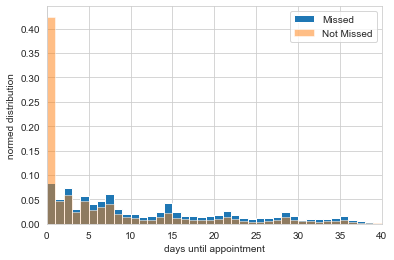

In [193]:
plt.hist(dfcopy.loc[dfcopy.TargetNoshow == 1,'Sche_Appt_days'], 
 label = 'Missed',bins = range(0,60,1), density = True)
plt.hist(dfcopy.loc[dfcopy.TargetNoshow == 0,'Sche_Appt_days'], 
 label = 'Not Missed',bins = range(0,60,1), density = True,alpha =0.5)
plt.legend()
plt.xlabel('days until appointment')
plt.ylabel('normed distribution')
plt.xlim(0,40)
plt.show()
# This distribution shows most of the patients who did not miss their appointment scheduled the appointment 
# on the same day. 

<AxesSubplot:xlabel='TargetNoshow', ylabel='count'>

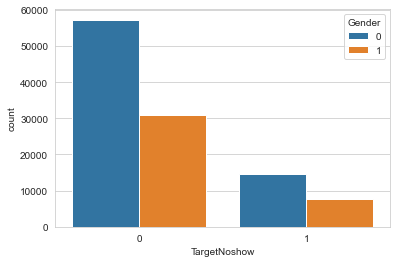

In [194]:
sbn.set_style('whitegrid')
sbn.countplot(x='TargetNoshow',hue='Gender', data=dfcopy) # use argument to set color: palette=''

In [195]:
dfcopy.drop(['AppointmentDay','ScheduledDay'],axis=1,inplace=True)

In [196]:
dfcopy.info

<bound method DataFrame.info of               PatientId  AppointmentID  Gender  Age  Neighbourhood  \
34218     3469431281946        5649465       0    0       REDENÇÃO   
102834      48826747693        5659726       0    0        MARUÍPE   
102832    9726846148373        5749887       0    0        MARUÍPE   
102830   28452896784213        5664173       1    0  SÃO CRISTÓVÃO   
49411   726999492642124        5650471       0    0  SANTOS DUMONT   
...                 ...            ...     ...  ...            ...   
63915    31963211613981        5700279       0  115     ANDORINHAS   
76284    31963211613981        5744037       0  115     ANDORINHAS   
68127    31963211613981        5562812       0  115     ANDORINHAS   
63912    31963211613981        5700278       0  115     ANDORINHAS   
97666   748234579244724        5717451       0  115       SÃO JOSÉ   

        Scholarship  Hipertension  Diabetes  Alcoholism  Handicap  ...  \
34218             0             0         0          

In [197]:
dfcopy[['Age','Scholarship','Hipertension','Diabetes','Alcoholism',
            'Handicap', 'SMS_received','Sche_Appt_days','TargetNoshow']].corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Sche_Appt_days,TargetNoshow
Age,1.000000,-0.092469,0.504599,0.292398,0.095811,0.078101,0.012629,0.034715,-0.060320
Scholarship,-0.092469,1.000000,-0.019738,-0.024899,0.035019,-0.008555,0.001182,-0.030244,0.029166
Hipertension,0.504599,-0.019738,1.000000,0.433082,0.087967,0.080162,-0.006285,-0.016952,-0.035662
Diabetes,0.292398,-0.024899,0.433082,1.000000,0.018471,0.057578,-0.014561,-0.027093,-0.015158
Alcoholism,0.095811,0.035019,0.087967,0.018471,1.000000,0.004668,-0.026154,-0.038537,-0.000181
Handicap,0.078101,-0.008555,0.080162,0.057578,0.004668,1.000000,-0.024097,-0.019808,-0.006290
SMS_received,0.012629,0.001182,-0.006285,-0.014561,-0.026154,-0.024097,1.000000,0.397876,0.126502
Sche_Appt_days,0.034715,-0.030244,-0.016952,-0.027093,-0.038537,-0.019808,0.397876,1.000000,0.185908
TargetNoshow,-0.060320,0.029166,-0.035662,-0.015158,-0.000181,-0.006290,0.126502,0.185908,1.000000


<AxesSubplot:>

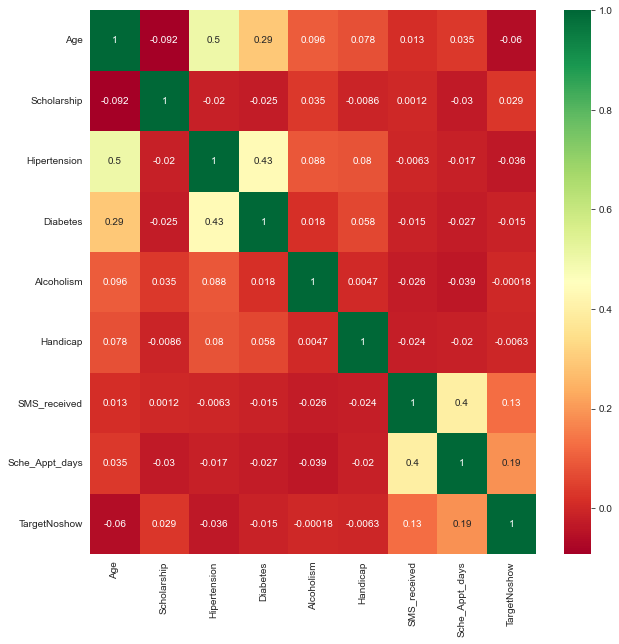

In [198]:
plt.figure(figsize=(10,10))
sbn.heatmap(dfcopy[['Age','Scholarship','Hipertension','Diabetes','Alcoholism',
            'Handicap', 'SMS_received','Sche_Appt_days','TargetNoshow']].corr(),annot=True,cmap='RdYlGn')

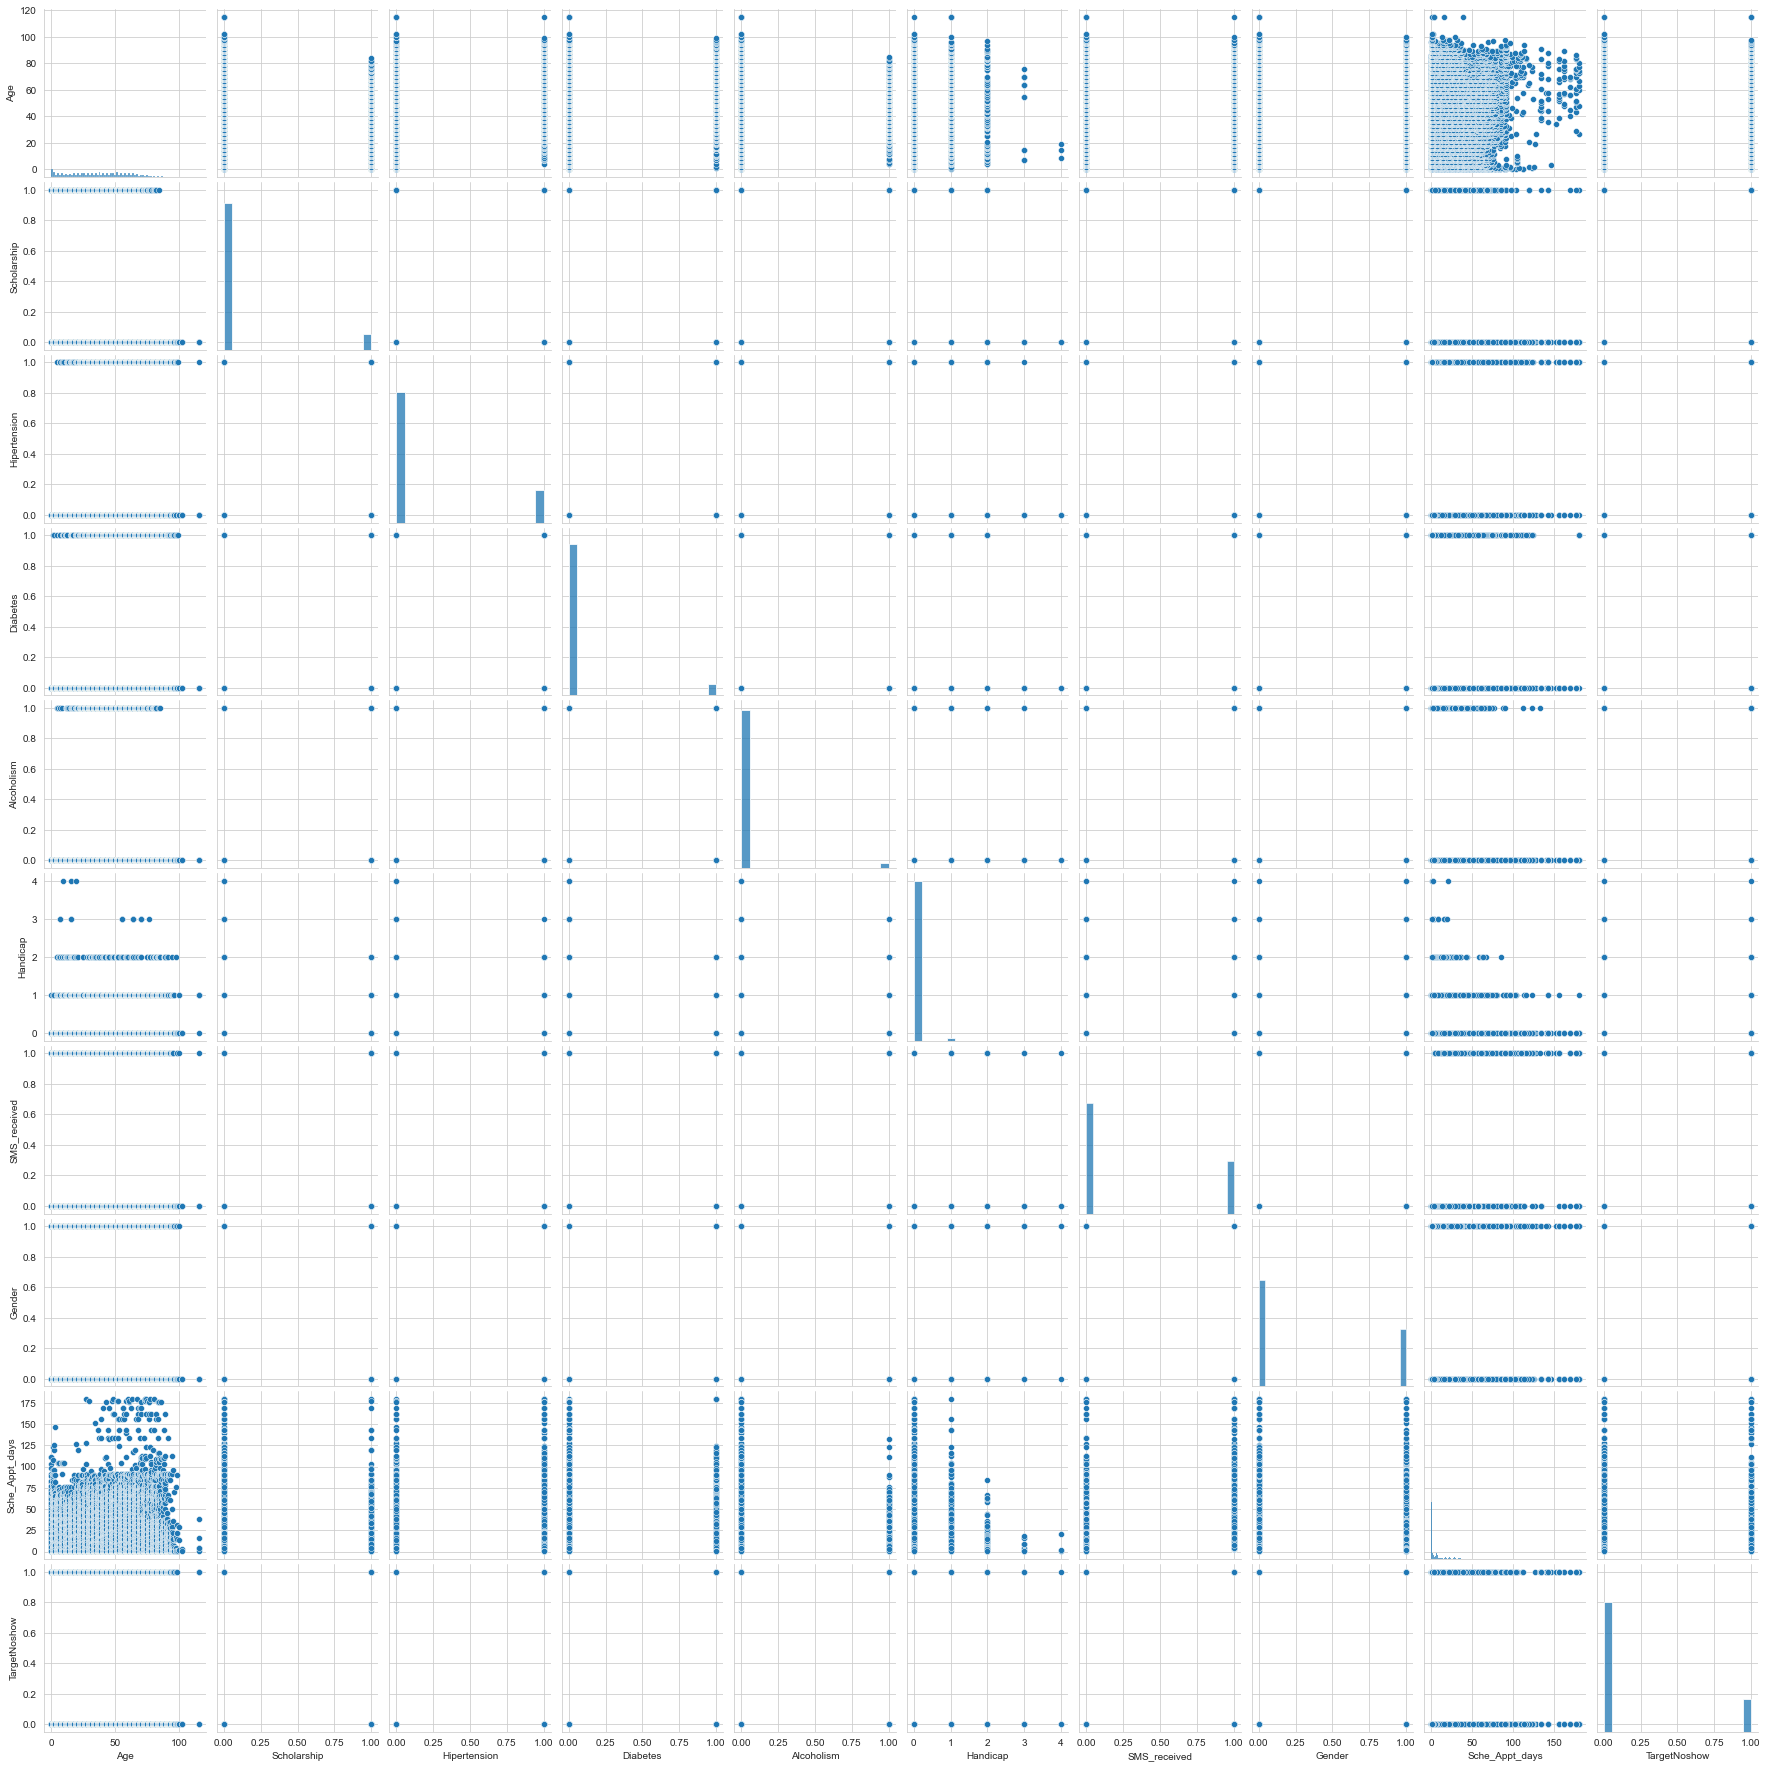

In [202]:
sbn.pairplot(dfcopy[['Age','Scholarship','Hipertension','Diabetes','Alcoholism',
            'Handicap', 'SMS_received','Gender','Sche_Appt_days','TargetNoshow']])  #independent columns

In [203]:
dfcopy.to_csv('dfcopy.csv',index=False)

In [204]:
%pwd

'C:\\Users\\yumei\\CSP Workshop 2023\\Data'

#### The course materials are developed mainly based on my personal experience and contributions from the Python learning community. 

Referred Books: 
- Learning Python, 5th Edition by Mark Lutz
- Python Data Science Handbook, Jake, VanderPlas
- Python for Data Analysis, Wes McKinney 

Copyright ©2023 Mei Najim. All rights reserved.   